<a href="https://colab.research.google.com/github/127-0-0-vvk/YOLOR_object_detection/blob/main/YOLOR_Object_Detection_Images_%26_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Run YOLOR on Google Colab - Images & Video**

YoloR just got released, and it is better and faster than YoloV4, Scaled YoloV4, YoloV5 and PP-YOLOv2. In this YOLOR Object Detection Tutorial I am going to show you how to get YOLOR which stands for You Only Learn One Representation, working on Collab, on Images and Video. All right here and right now. No time to waste guys, lets get started!!

Visit the original repo [https://github.com/WongKinYiu/yolor](https://github.com/WongKinYiu/yolor). 




# **Setting up Dependencies**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! git clone https://github.com/WongKinYiu/yolor
%cd yolor
!git reset --hard eb3ef0b7472413d6740f5cde39beb1a2f5b8b5d1

Cloning into 'yolor'...
remote: Enumerating objects: 492, done.
remote: Total 492 (delta 0), reused 0 (delta 0), pack-reused 492
Receiving objects: 100% (492/492), 3.42 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (227/227), done.
/content/yolor
fatal: Could not parse object 'eb3ef0b7472413d6740f5cde39beb1a2f5b8b5d1'.


In [ ]:
# pip install required packages
!pip install -qr requirements.txt

     |████████████████████████████████| 776.7 MB 4.6 kB/s 
     |████████████████████████████████| 12.7 MB 54.9 MB/s 
     |████████████████████████████████| 1.5 MB 50.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.7.0 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.7.0 which is incompatible.
fastai 2.7.9 requires torchvision>=0.8.2, but you have torchvision 0.8.1 which is incompatible.


In [ ]:
# Install Mish CUDA
!git clone https://github.com/JunnYu/mish-cuda
%cd mish-cuda
!git reset --hard 6f38976064cbcc4782f4212d7c0c5f6dd5e315a8
!python setup.py build install
%cd ..

In [ ]:
# Install PyTorch Wavelets
!git clone https://github.com/fbcotter/pytorch_wavelets
%cd pytorch_wavelets
!pip install .
%cd ..

Cloning into 'pytorch_wavelets'...
remote: Enumerating objects: 978, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 978 (delta 79), reused 91 (delta 46), pack-reused 836
Receiving objects: 100% (978/978), 6.80 MiB | 27.85 MiB/s, done.
Resolving deltas: 100% (663/663), done.
/content/yolor/pytorch_wavelets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/yolor/pytorch_wavelets
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for pytorch-wavelets: filename=pytorch_wavelets-1.3.0-py3-none-any.wh

In [ ]:
!bash scripts/get_pretrain.sh

awk: cannot open ./cookie (No such file or directory)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  142M  100  142M    0     0  71.8M      0  0:00:01  0:00:01 --:--:--  118M
rm: cannot remove './cookie': No such file or directory
awk: cannot open ./cookie (No such file or directory)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  305M  100  305M    0     0   198M      0  0:00:01  0:00:01 --:--:--  246M
rm: cannot remove './cookie': No such file or directory


# **Runing on Image**

In [ ]:
!python detect.py --source inference/images/horses.jpg --cfg cfg/yolor_p6.cfg --weights yolor_p6.pt --conf 0.25 --img-size 1280 --device 0 --output /content/drive/MyDrive/Projects/Dev/yolor_output_image/


Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_p6.cfg', classes=None, conf_thres=0.25, device='0', img_size=1280, iou_thres=0.5, names='data/coco.names', output='/content/drive/MyDrive/Projects/Dev/yolor_output_image/', save_txt=False, source='inference/images/horses.jpg', update=False, view_img=False, weights=['yolor_p6.pt'])
image 1/1 /content/yolor/inference/images/horses.jpg: 896x1280 5 horses, Done. (0.056s)
Results saved to /content/drive/MyDrive/Projects/Dev/yolor_output_image
Done. (0.213s)


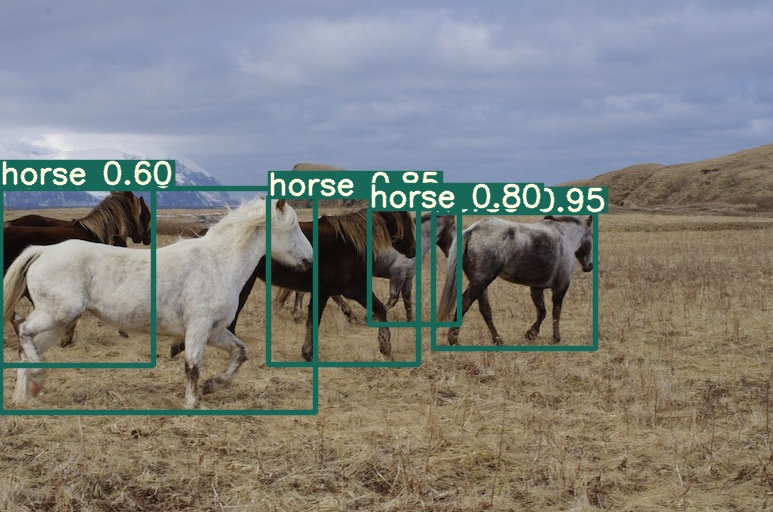

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/drive/MyDrive/Projects/Dev/yolor_output_image/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# **Running on Video**

**[USER INPUT] You can either upload a video using the files upload dialog or upload it to google drive**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving japan.mp4 to japan.mp4


**[USER INPUT] Insert File Name into Source**

In [ ]:
!python detect.py --source japan.mp4 --cfg cfg/yolor_p6.cfg --weights yolor_p6.pt --conf 0.25 --img-size 1280 --device 0 --output /content/drive/MyDrive/Projects/Dev/yolor_output_video/

**OR**

**[USER INPUT] Upload video from Google Drive**

You will need to specify your input and output folders on GDrive.

In [ ]:
!python detect.py --source /content/drive/MyDrive/Projects/Dev/yolor_input/1.mp4 --cfg cfg/yolor_p6.cfg --weights yolor_p6.pt --conf 0.25 --img-size 1280 --device 0 --output /content/drive/MyDrive/Projects/Dev/yolor_output_video/

## **Display Output**

We need to compress the video in order to display large videos. Otherwise you can download it straight from you Google Drive Folder

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "/content/drive/MyDrive/Projects/Dev/yolor_output_video/japan.mp4"  #Get your video Here

# Compressed video path
compressed_path = "/content/drive/MyDrive/Projects/Dev/yolor_output_video/result.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)